# How to download copernicus ERA5 data and visualiazation with Python (Part 2)

## ERA5 data visualisation with Jupyter Notebooks

In this second part of the tutorial, we will show basic era5 data analysis using some data that was downloaded in the first part of this tutorial.

<div class="alert alert-info"
     
You might have noticed already that both these tutorials are on Jupyter Notebooks. Jupyter Notebooks have a simple interface, they are interactive, where you can make a single change and execute a small chunck of code and see the effect it makes which is a great tool for experimenting with the data. It is very user friendly where you can change from a markdown to a code, in the first half of this tutorial we used a Jupyter Notebook mainly for Notes with picutres on how to access ERA5 data and in this second part we will use it mostly to code and view the results. Jupyter Notebooks ar a great way to introduce Python programming to begginers and they are good to make reproducable research. 

## Let us get to it

### How to import the needed libraries. 

First, we will import needed libraries that will assist us in our data visualisation. This includes Numpy, pyplot module of matplotlib needed for plotting and xarray that is used for netcdf data access and crs (coordinate refrence systems)  module of cartopy for mapping. All these modules are already downloaded on my machine.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr 
import cartopy.crs as ccrs

We will then use the data we downloaded, we will open it using the xarray function called open.dataarray and we will show the overview of 2020 monthly average 2m tenperature. We create a function called temp and use our xarray function to open our data.

In [3]:
temp = xr.open_dataarray('t2m_2020.nc')
temp

<xarray.DataArray 't2m' (time: 12, latitude: 721, longitude: 1440)>
[12458880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

We can see the summary of the data that we have just opened. We can see that is three dimensions in the data, thus `time, latitude, longitude'` and the contents of the dataset itself, namely the `2 metre temperature in Kelvins (K)`.

### Extracting and plotting point data


First let us plot the temp column over a certain area in South Africa, Johannesburg. We will do this using the coordinates of a point in a place in Johannesburg as shown below.

We want temperature data of a place situated in the latitude -26 and longitude 27 and we then assigned that to a variable named soweto, since those are the coordinates of that area in Johannesburg.

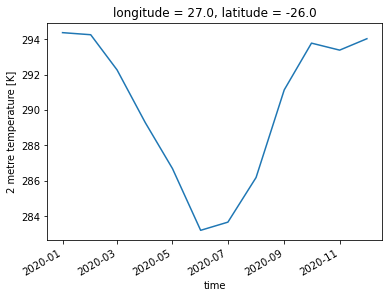

In [4]:
soweto= temp.sel(latitude=-26, longitude=27)
soweto.plot()

We can see a line plot showing 2020 monthly averaged 2m temperature in Kelvins over a point in Soweto Johannesburg. The axis are correctly labelled with each month of the year 2020. We can also see a dip in monthly average temperature in May, June and July (2020-05 to 2020-07) this is because it is winter months in the region so average monthly temperatures are low. 


We can also compare two different places over Southern Africa, say Maputo for example, which is a coastal city and in low-lying area. We select the nearest method, meaning if exact those points are not contained in my dataset then xaarray can select the nearest avaialble coordinates. W all tell the plot that we want a line plot and the x-axis should be the time dimension. 

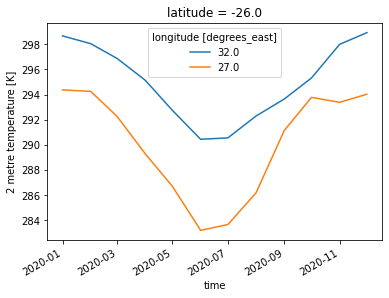

In [8]:
temp.sel(latitude=-26, longitude=[32, 27], method='nearest').plot.line(x='time')

We can see two color plots, one for Johannesburg and the other for Maputo. We can see that for 2020 monthly averages Maputo is much more warmer than Johannesburg, although they do exprience winter in the same months. 

### Maps

What if we want to see this data on a map? and see spatial relationships?

We will take our temp variable (which contains our data) then use the *isel* like before which is selecting by index, thus using the position within the time index, which is why we use the time=0, thus the first time step in the data for all locations on the earth meaning we are looking at the averaged January 2m temperatures in 2020.

The robust=True function of the plot, removes outliers from the creation of the map

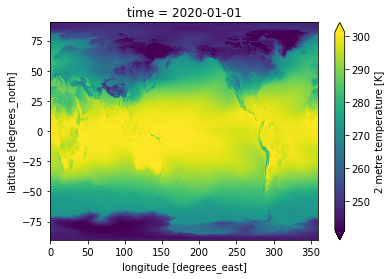

In [9]:
temp.isel(time=0).plot(robust=True)

This map isn't good looking since it is centred over the ocean, splitting Europe in half and Africa situated at the edge and it is not fine with us, but it is fine  to a have a quick view. We can then project this onto a map coordinate system and centre it over Africa

We use matplotlib to firstly create a much bigger figure than we have above. Secondly, we pass the argument that we want to use the Orthographic projection from ccrs tools in cartopy. We centre the map over some point in Southern Africa. 

We then use our *isel* method to select the last month in our 2020 monthly average data, which is December 2020 and then transform data into the platecarree and we also removed the outliers using robust=True

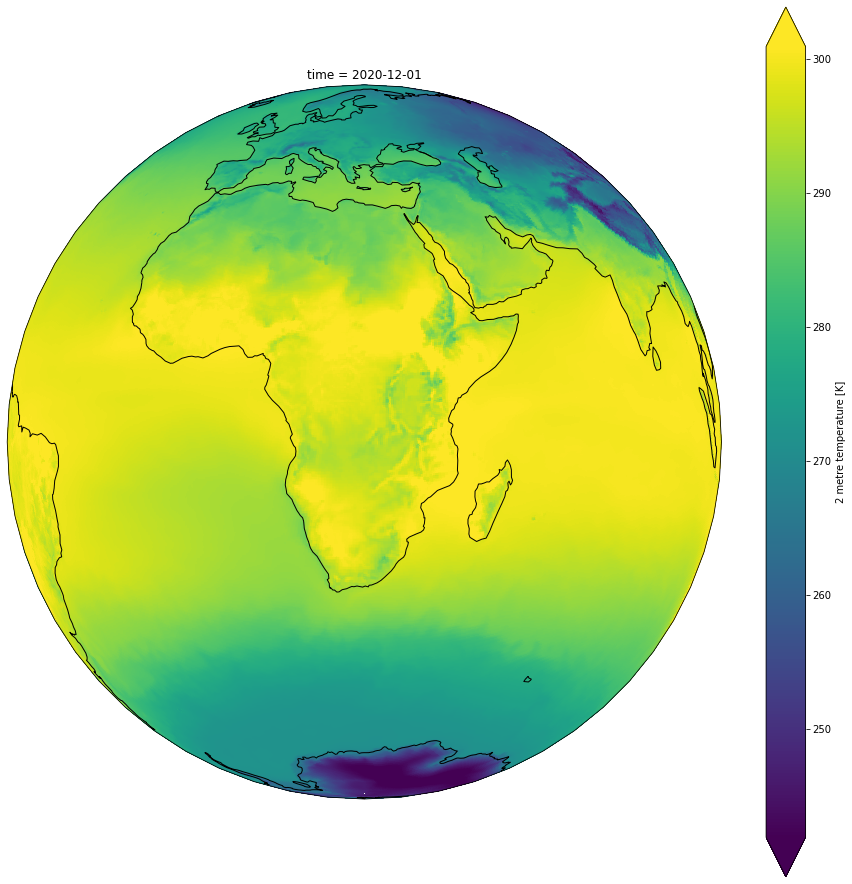

In [10]:
plt.figure(figsize=(16,16))
ax = plt.axes(projection=ccrs.Orthographic(25, -10))
ax.coastlines()
# Use the last time step in array
p = temp.isel(time=-1).plot(transform=ccrs.PlateCarree(), robust=True)